In [1]:
import pandas as pd
import json
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
SMALL_SIZE = 18
SMALLER_SIZE = 16
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALLER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALLER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def extract_log_event(row):
    event = row['logs'][0]['event']
    return event

In [4]:
logs = []
with open('logs_expt_base.txt') as f:
    for line in f.readlines():
        logs.append(json.loads(line))

df = pd.DataFrame(logs)
del df['cumulativeGasUsed']
df['event'] = df.apply(extract_log_event, axis=1)
dataCreation_base = df[df['event'] == "newData"]
permission_base = df[df['event'] == "permissionAdded"]
dataTransfer_base = df[df['event'] == "dataTransferred"]

In [5]:
logs = []
with open('logs_expt_1.txt') as f:
    for line in f.readlines():
        logs.append(json.loads(line))

df = pd.DataFrame(logs)
del df['cumulativeGasUsed']
df['event'] = df.apply(extract_log_event, axis=1)
dataCreation_1 = df[df['event'] == "newData"]
permission_1 = df[df['event'] == "permissionUpdated"]
dataTransfer_1 = df[df['event'] == "dataTransferred"]

In [6]:
logs = []
with open('logs_expt_base_mem.txt') as f:
    for line in f.readlines():
        logs.append(json.loads(line))

df = pd.DataFrame(logs)
del df['cumulativeGasUsed']
df['event'] = df.apply(extract_log_event, axis=1)

dataCreation_base_mem = df[df['event'] == "newData"]
permission_base_mem = df[df['event'] == "permissionAdded"]
dataTransfer_base_mem = df[df['event'] == "dataTransferred"]

In [7]:
logs = []
with open('logs_expt_1_mem.txt') as f:
    for line in f.readlines():
        logs.append(json.loads(line))

df = pd.DataFrame(logs)
del df['cumulativeGasUsed']

df['event'] = df.apply(extract_log_event, axis=1)

dataCreation_1_mem = df[df['event'] == "newData"]
permission_1_mem = df[df['event'] == "permissionUpdated"]
dataTransfer_1_mem = df[df['event'] == "dataTransferred"]

## Authorizing users

In [8]:
del permission_base['event']
del permission_base['tx']
del permission_base_mem['event']
del permission_base_mem['tx']
del permission_1_mem['event']
del permission_1_mem['tx']
del permission_1['event']
del permission_1['tx']

In [9]:
def extract_permission(row):
    return int(row['logs'][0]['args']['numPPR'])

permission_base['numPPR'] = permission_base.apply(extract_permission, axis=1)
permission_base_mem['numPPR'] = permission_base_mem.apply(extract_permission, axis=1)
permission_1_mem['numPPR'] = permission_1_mem.apply(extract_permission, axis=1)
permission_1['numPPR'] = permission_1.apply(extract_permission, axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
permission_basedf = pd.DataFrame()
permission_basedf['gasUsed'] = permission_base.groupby(by='numPPR')['gasUsed'].mean()
permission_basedf['type'] = 'base'
permission_basedf.reset_index(inplace=True)

permission_1df = pd.DataFrame()
permission_1df['gasUsed'] = permission_1.groupby(by='numPPR')['gasUsed'].mean()
permission_1df['type'] = 'expt1'
permission_1df.reset_index(inplace=True)

permission_basememdf = pd.DataFrame()
permission_basememdf['gasUsed'] = permission_base_mem.groupby(by='numPPR')['gasUsed'].mean()
permission_basememdf['type'] = 'base_mem'
permission_basememdf.reset_index(inplace=True)

permission_1memdf = pd.DataFrame()
permission_1memdf['gasUsed'] = permission_1_mem.groupby(by='numPPR')['gasUsed'].mean()
permission_1memdf['type'] = 'expt1_mem'
permission_1memdf.reset_index(inplace=True)

In [11]:
import numpy as np

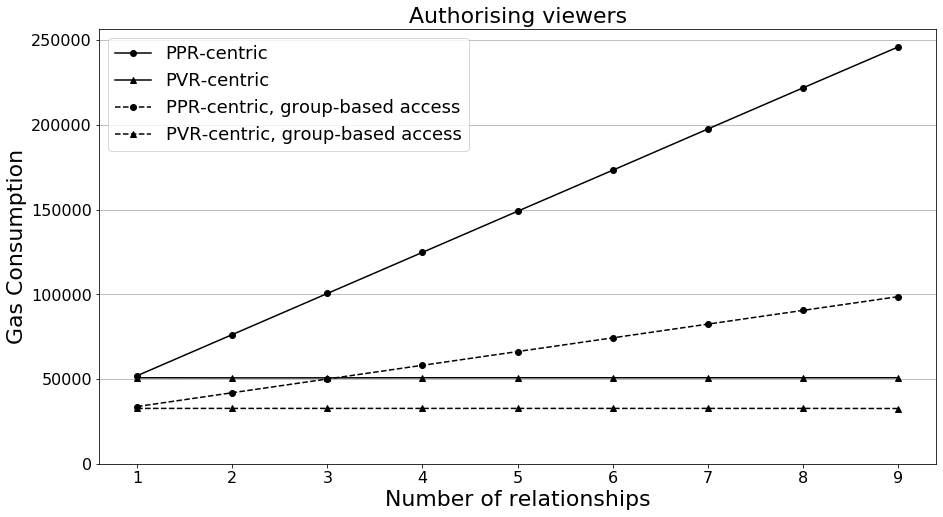

In [24]:
plt.figure(num=None, figsize=(15,8))
plt.plot(permission_basedf['numPPR'], permission_basedf['gasUsed'], 'ko-', label='PPR-centric')
plt.plot(permission_1df['numPPR'], permission_1df['gasUsed'], 'k^-', label='PVR-centric')
plt.plot(permission_basememdf['numPPR'], permission_basememdf['gasUsed'], 'ko--', label='PPR-centric, group-based access')
plt.plot(permission_1memdf['numPPR'], permission_1memdf['gasUsed'], 'k^--', label='PVR-centric, group-based access')

plt.xlabel('Number of relationships')
plt.ylabel('Gas Consumption')
plt.title('Authorising viewers')
plt.ylim(bottom=0)
plt.yticks(np.arange(0, 260000, step=50000))
plt.grid(True, axis='y')
plt.legend()
plt.savefig('auth_viewers.png')
plt.show()


## Data Transfer

In [25]:
del dataTransfer_base['tx']
del dataTransfer_base['event']
del dataTransfer_1['tx']
del dataTransfer_1['event']
del dataTransfer_base_mem['tx']
del dataTransfer_base_mem['event']
del dataTransfer_1_mem['tx']
del dataTransfer_1_mem['event']

In [26]:
def extract_transfer(row):
    return int(row['logs'][0]['args']['numPPR'])

dataTransfer_base['numPPR'] = dataTransfer_base.apply(extract_transfer, axis=1)
dataTransfer_1['numPPR'] = dataTransfer_1.apply(extract_transfer, axis=1)
dataTransfer_base_mem['numPPR'] = dataTransfer_base_mem.apply(extract_transfer, axis=1)
dataTransfer_1_mem['numPPR'] = dataTransfer_1_mem.apply(extract_transfer, axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [27]:
dataTransfer_basedf = pd.DataFrame()
dataTransfer_basedf['gasUsed'] = dataTransfer_base.groupby(by='numPPR')['gasUsed'].mean()
dataTransfer_basedf['type'] = 'base'
dataTransfer_basedf.reset_index(inplace=True)

dataTransfer_1df = pd.DataFrame()
dataTransfer_1df['gasUsed'] = dataTransfer_1.groupby(by='numPPR')['gasUsed'].mean()
dataTransfer_1df['type'] = 'expt1'
dataTransfer_1df.reset_index(inplace=True)

dataTransfer_basememdf = pd.DataFrame()
dataTransfer_basememdf['gasUsed'] = dataTransfer_base_mem.groupby(by='numPPR')['gasUsed'].mean()
dataTransfer_basememdf['type'] = 'base_mem'
dataTransfer_basememdf.reset_index(inplace=True)

dataTransfer_1memdf = pd.DataFrame()
dataTransfer_1memdf['gasUsed'] = dataTransfer_1_mem.groupby(by='numPPR')['gasUsed'].mean()
dataTransfer_1memdf['type'] = 'expt1_mem'
dataTransfer_1memdf.reset_index(inplace=True)

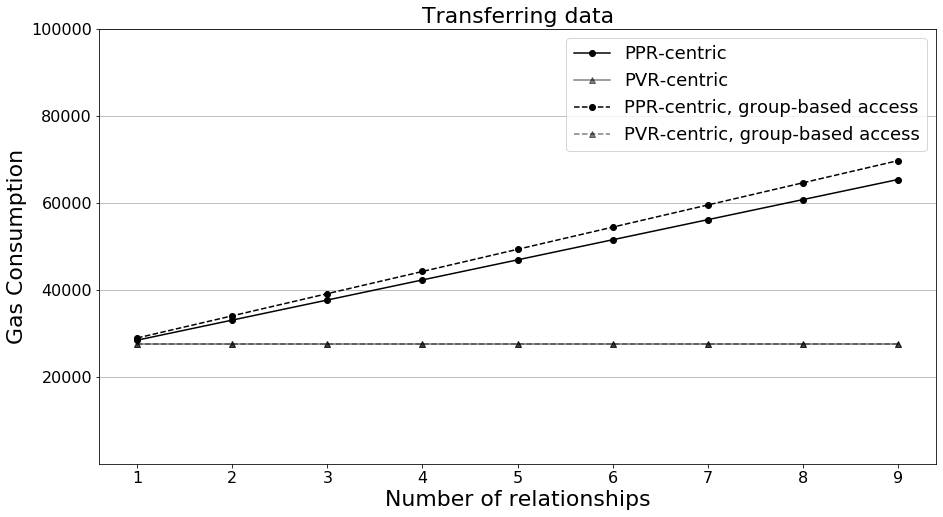

In [28]:
plt.figure(num=None, figsize=(15,8))
plt.plot(dataTransfer_basedf['numPPR'], dataTransfer_basedf['gasUsed'], 'ko-', label='PPR-centric')
plt.plot(dataTransfer_1df['numPPR'], dataTransfer_1df['gasUsed'], 'k^-', label='PVR-centric', alpha=0.5)
plt.plot(dataTransfer_basememdf['numPPR'], dataTransfer_basememdf['gasUsed'], 'ko--', label='PPR-centric, group-based access')
plt.plot(dataTransfer_1memdf['numPPR'], dataTransfer_1memdf['gasUsed'], 'k^--', label='PVR-centric, group-based access', alpha=0.5)

plt.xlabel('Number of relationships')
plt.ylabel('Gas Consumption')
plt.title('Transferring data')
plt.ylim(bottom=0)
plt.yticks(np.arange(20000, 110000, step=20000))
plt.grid(True, axis='y')
plt.legend()
plt.savefig('data_transfer.png')
plt.show()

## Data creation

In [29]:
print(dataCreation_base['gasUsed'].mean())
print(dataCreation_base_mem['gasUsed'].mean())
print(dataCreation_1['gasUsed'].mean())
print(dataCreation_1_mem['gasUsed'].mean())

249094.60928
249065.22472
243523.48256
243504.0304


In [30]:
def extract_args(row):
    patient = row['logs'][0]['args']['owner']
    num_records = row['logs'][0]['args']['numRecords']
    return patient, num_records

dataCreation_base['patient'], dataCreation_base['num_records'] = zip(*dataCreation_base.apply(extract_args, axis=1))
dataCreation_base_mem['patient'], dataCreation_base_mem['num_records'] = zip(*dataCreation_base_mem.apply(extract_args, axis=1))
dataCreation_1['patient'], dataCreation_1['num_records'] = zip(*dataCreation_1.apply(extract_args, axis=1))
dataCreation_1_mem['patient'], dataCreation_1_mem['num_records'] = zip(*dataCreation_1_mem.apply(extract_args, axis=1))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [47]:
dataCreation_base.columns

Index(['gasUsed', 'logs', 'tx', 'event', 'patient', 'num_records'], dtype='object')

In [31]:
del dataCreation_base['logs'], dataCreation_base['tx'], dataCreation_base['event']
del dataCreation_base_mem['logs'], dataCreation_base_mem['tx'], dataCreation_base_mem['event']
del dataCreation_1['logs'], dataCreation_1['tx'], dataCreation_1['event']
del dataCreation_1_mem['logs'], dataCreation_1_mem['tx'], dataCreation_1_mem['event']

In [55]:
dataCreation_1.head()

,gasUsed,patient,num_records
510,240107,0x0B84397dA59B31b20D6F12464c131AE9EbdeBde7,1
511,245375,0x0B84397dA59B31b20D6F12464c131AE9EbdeBde7,2
512,245375,0x0B84397dA59B31b20D6F12464c131AE9EbdeBde7,3
513,245375,0x0B84397dA59B31b20D6F12464c131AE9EbdeBde7,4
514,245375,0x0B84397dA59B31b20D6F12464c131AE9EbdeBde7,5


In [32]:
basedf = dataCreation_base[dataCreation_base['patient'] == "0x16a8aB2D944C458DA6c0e1968f0E078a8d3604b8"].reset_index()
base_memdf = dataCreation_base_mem[dataCreation_base_mem['patient'] == "0x0222be657e6Dd23473D8032Afa4799E9EA44Fe83"].reset_index()
ex1df = dataCreation_1[dataCreation_1['patient'] == "0x0B84397dA59B31b20D6F12464c131AE9EbdeBde7"].reset_index()
ex1_memdf = dataCreation_1_mem[dataCreation_1_mem['patient'] == "0x10A58F6645cC4e58209EF8dDf082dFbc799acC0A"].reset_index()

In [33]:
xval = list(range(1,101))

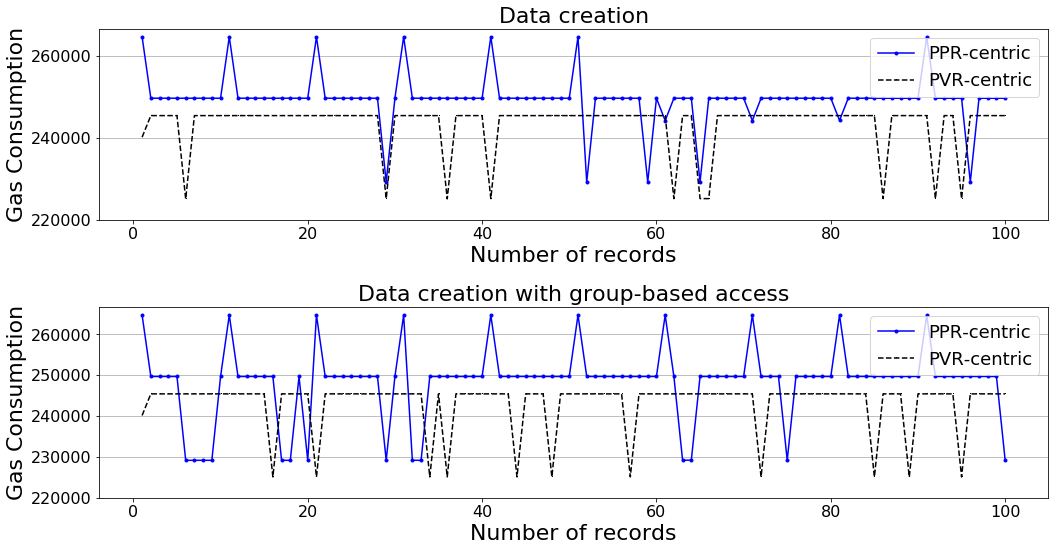

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(15,8))

axs[0].plot(xval, basedf['gasUsed'], 'b.-', label='PPR-centric')
axs[0].plot(xval, ex1df['gasUsed'], 'k,--', label='PVR-centric')
axs[1].plot(xval, base_memdf['gasUsed'], 'b.-', label='PPR-centric')
axs[1].plot(xval, ex1_memdf['gasUsed'], 'k,--', label='PVR-centric')

# axs[0].set_xlabel('Number of records')
axs[0].set_ylabel('Gas Consumption')
axs[0].set_ylim(bottom=220000)
axs[0].set_yticks(np.arange(220000, 280000, step=20000))
axs[0].grid(True, axis='y')
axs[0].legend()
axs[0].set_title("Data creation")
axs[0].set_xlabel('Number of records')
axs[1].set_xlabel('Number of records')
axs[1].set_ylabel('Gas Consumption')
axs[1].set_ylim(bottom=220000)
axs[1].set_yticks(np.arange(220000, 270000, step=10000))
axs[1].grid(True, axis='y')
axs[1].legend()
axs[1].set_title("Data creation with group-based access")
fig.tight_layout()
fig.savefig('data_creation.png')
plt.show()

# Search

In [55]:
logs = []
with open('logs_search.txt') as f:
    for line in f.readlines():
        logs.append(json.loads(line))

df = pd.DataFrame(logs)

In [57]:
df['event'] = df.apply(extract_log_event, axis=1)

In [58]:
df

,cumulativeGasUsed,gasUsed,logs,tx,event
0,66251,66251,"[{'logIndex': 0, 'event': 'UpdateEvent', 'args...",0x379ce589ef55e95a3c717de8a5c958d53c275a355b9d...,UpdateEvent
1,65803,65803,"[{'logIndex': 0, 'event': 'UpdateEvent', 'args...",0x6995191bea98377f09d863895992e6d8fecd048306b5...,UpdateEvent
2,65995,65995,"[{'logIndex': 0, 'event': 'UpdateEvent', 'args...",0x1474e85ab8000c5df9097ca0d68da90ef3ee1a19629a...,UpdateEvent
3,66059,66059,"[{'logIndex': 0, 'event': 'UpdateEvent', 'args...",0x3abcf63626de4804d65cf900955b53fc277d5ec15ca2...,UpdateEvent
4,25425,25425,"[{'logIndex': 0, 'event': 'SearchEvent', 'args...",0xa118ca84d530b6cb0d76ddd1992b285384e4489e690b...,SearchEvent
5,24661,24661,"[{'logIndex': 0, 'event': 'SearchEvent', 'args...",0x0a3c7b7d7ff8bd211c7c1b3cb5cb852714eb2ffdcf0e...,SearchEvent
6,51251,51251,"[{'logIndex': 0, 'event': 'UpdateEvent', 'args...",0xa6007f533642227ff1f94db655aeea700e8fecf12a13...,UpdateEvent
7,65803,65803,"[{'logIndex': 0, 'event': 'UpdateEvent', 'args...",0x29a88634df24115520a1549a8d72b152c889192da11d...,UpdateEvent
8,65995,65995,"[{'logIndex': 0, 'event': 'UpdateEvent', 'args...",0x503d1420e6dc5b9c16c6aa157e57a5ccc09f09327b97...,UpdateEvent
9,66059,66059,"[{'logIndex': 0, 'event': 'UpdateEvent', 'args...",0x8c8df7609776b8e59cbaa58b013c2bbc8ea788774e95...,UpdateEvent


In [59]:
df[df['event'] == "UpdateEvent"]['gasUsed'].mean()

63007.8

In [60]:
df[df['event'] == "SearchEvent"]['gasUsed'].mean()

25185.285714285714